<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required library
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()

# Convert to a DataFrame for easy viewing
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first 5 rows
print("Original Iris Dataset:")
print(df.head())


Original Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
# Select only Setosa (0) and Versicolor (1)
df_binary = df[df['target'] != 2]

# Features (X) and target (y)
X = df_binary[['sepal length (cm)', 'sepal width (cm)']]  # use 2 features for visualization
y = df_binary['target']

# Show dataset summary
print("\nBinary Classification Dataset (Setosa vs Versicolor):")
print(df_binary.head())
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)



Binary Classification Dataset (Setosa vs Versicolor):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Shape of X: (100, 2)
Shape of y: (100,)


In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for visualization
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=['sepal length (scaled)', 'sepal width (scaled)'])

print("Before Scaling (first 5 rows):")
print(X.head())

print("\nAfter Scaling (first 5 rows):")
print(scaled_df.head())


Before Scaling (first 5 rows):
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6

After Scaling (first 5 rows):
   sepal length (scaled)  sepal width (scaled)
0              -0.581066              0.841837
1              -0.894309             -0.207835
2              -1.207552              0.212034
3              -1.364174              0.002099
4              -0.737687              1.051772


In [5]:
from sklearn.model_selection import train_test_split

# Split the scaled data into training and testing sets
# 70% training, 30% testing (common split ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Display sizes of splits
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 70
Testing set size: 30


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the kernel types to test
kernels = ['linear', 'poly', 'rbf']

# Dictionary to store accuracies
accuracies = {}

# Train and evaluate each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc
    print(f"Kernel = {kernel:<7} | Accuracy = {acc:.3f}")


Kernel = linear  | Accuracy = 1.000
Kernel = poly    | Accuracy = 1.000
Kernel = rbf     | Accuracy = 1.000


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svm_decision_boundary(model, X, y, title):
    """
    Function to plot SVM decision boundary, margins, and support vectors.
    """
    plt.figure(figsize=(6, 4))

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

    # Plot decision boundary and margins
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0]-1, xlim[1]+1, 200),
                         np.linspace(ylim[0]-1, ylim[1]+1, 200))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
                alpha=0.8, linestyles=['--', '-', '--'])

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(title)
    plt.xlabel('Sepal Length (scaled)')
    plt.ylabel('Sepal Width (scaled)')
    plt.legend()
    plt.show()


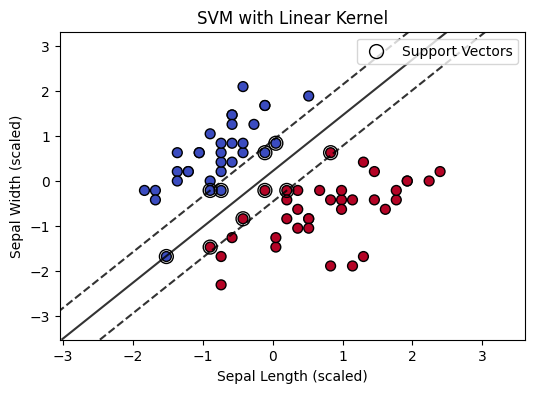

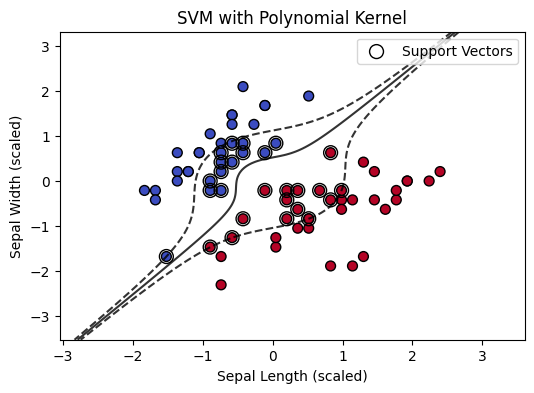

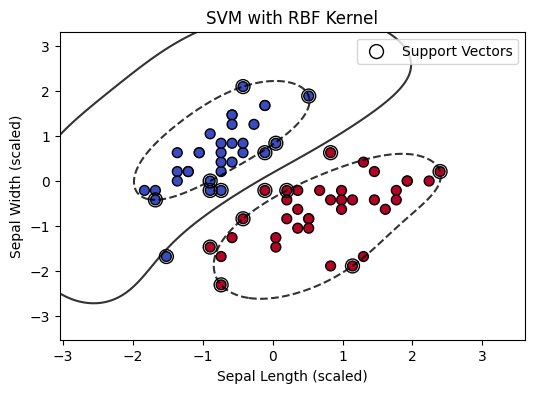

In [8]:
# Linear Kernel
linear_model = SVC(kernel='linear').fit(X_train, y_train)
plot_svm_decision_boundary(linear_model, X_train, y_train, "SVM with Linear Kernel")

# Polynomial Kernel
poly_model = SVC(kernel='poly', degree=3).fit(X_train, y_train)
plot_svm_decision_boundary(poly_model, X_train, y_train, "SVM with Polynomial Kernel")

# RBF Kernel
rbf_model = SVC(kernel='rbf').fit(X_train, y_train)
plot_svm_decision_boundary(rbf_model, X_train, y_train, "SVM with RBF Kernel")


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf']
}

# Create GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)

# Fit the grid search on training data
grid.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters Found:", grid.best_params_)

# Get best model
best_model = grid.best_estimator_

# Predict on test data
y_pred_best = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy of Tuned RBF Model: {accuracy:.3f}")


Best Parameters Found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

Accuracy of Tuned RBF Model: 1.000


In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



Confusion Matrix:
 [[17  0]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

